In [1]:
!pip install ipython-autotime
# !pip install -U scikit-learn
%load_ext autotime

time: 1.7 ms (started: 2021-01-20 11:04:19 +00:00)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 32.2 s (started: 2021-01-20 11:04:22 +00:00)


In [3]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/My Drive/ML/ml-project-master/src
time: 419 ms (started: 2021-01-20 11:04:55 +00:00)


In [4]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

from utility import *

time: 2.97 s (started: 2021-01-20 11:05:25 +00:00)


In [5]:
import keras.backend as K


def euclidean_distance_loss(y_true, y_pred):
    """
    Euclidean distance loss
    https://en.wikipedia.org/wiki/Euclidean_distance
    :param y_true: TensorFlow/Theano tensor
    :param y_pred: TensorFlow/Theano tensor of the same shape as y_true
    :return: float
    """
    return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

time: 49.3 ms (started: 2021-01-20 11:05:30 +00:00)


# Import Dataset

In [6]:
data = np.genfromtxt('ML-CUP20-TR.csv', delimiter=',', dtype=np.float64)
X = data[:, 1:-2]
y = data[:, -2:]

print(X.shape)
print(y.shape)

(1524, 10)
(1524, 2)
time: 260 ms (started: 2021-01-20 11:05:43 +00:00)


In [7]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.20, random_state=42)
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)

(1219, 10)
(1219, 2)
(305, 10)
(305, 2)
time: 9.93 ms (started: 2021-01-20 11:05:47 +00:00)


#Model

In [55]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout

BATCH_SIZE = len(Xtrain)

time: 6.82 ms (started: 2021-01-20 12:00:51 +00:00)


## Model 1 lr = 0.01

first model:  
    10->50->2  
    SGD  
    lr = 0.01  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = all

In [ ]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 287 ms (started: 2021-01-19 13:49:18 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

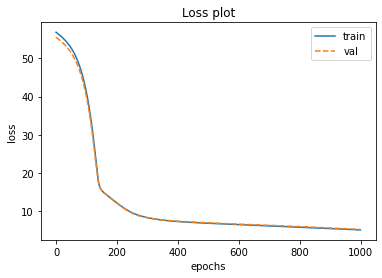

time: 224 ms (started: 2021-01-19 13:50:08 +00:00)


In [ ]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|5.1288395|	0.00|
Test	|5.2605872|	0.00|
time: 3.06 ms (started: 2021-01-19 13:50:08 +00:00)


## Model 1.1 Batch = 32

first model:  
    10->50->2  
    SGD  
    lr = 0.01  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 32

In [ ]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 40.3 ms (started: 2021-01-19 14:00:38 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

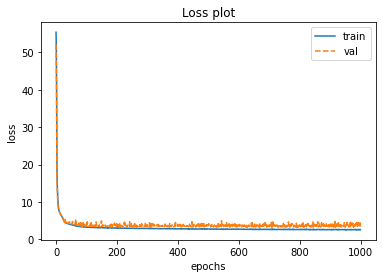

time: 197 ms (started: 2021-01-19 14:02:03 +00:00)


In [ ]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.6045756|	0.00|
Test	|3.4187131|	0.00|
time: 4 ms (started: 2021-01-19 14:02:03 +00:00)


## Model 1.2 Batch = 64

first model:  
    10->50->2  
    SGD  
    lr = 0.01  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 32

In [10]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 280 ms (started: 2021-01-20 11:11:45 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=32,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

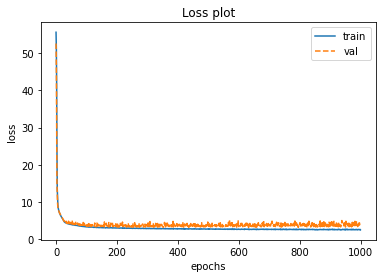

time: 220 ms (started: 2021-01-20 11:13:07 +00:00)


In [12]:
plot_loss(history)

In [13]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.5881999|	0.00|
Test	|3.6733954|	0.00|
time: 3.84 ms (started: 2021-01-20 11:13:07 +00:00)


## Model 1.2 Batch = 128

first model:  
    10->50->2  
    SGD  
    lr = 0.01  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [14]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 37.4 ms (started: 2021-01-20 11:16:44 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

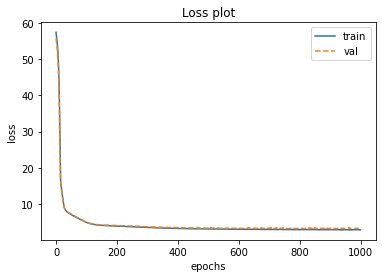

time: 187 ms (started: 2021-01-20 11:17:38 +00:00)


In [16]:
plot_loss(history)

In [17]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.9236367|	0.00|
Test	|3.3568075|	0.00|
time: 2.78 ms (started: 2021-01-20 11:17:38 +00:00)


## Model 1.2 Batch = 128 &lr=0.03

first model:  
    10->50->2  
    SGD  
    lr = 0.03  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [18]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.03, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 37.9 ms (started: 2021-01-20 11:19:25 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

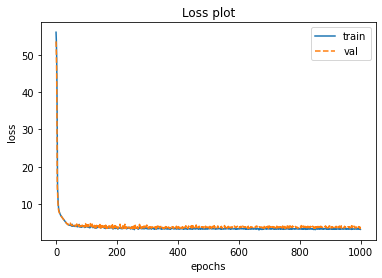

time: 194 ms (started: 2021-01-20 11:20:19 +00:00)


In [20]:
plot_loss(history)

In [21]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|3.2514670|	0.00|
Test	|3.7889869|	0.00|
time: 4.67 ms (started: 2021-01-20 11:20:20 +00:00)


## Model 1.2 Batch = 128 &lr=0.03

first model:  
    10->50->2  
    SGD  
    lr = 0.003  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [26]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.003, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 33.5 ms (started: 2021-01-20 11:36:22 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

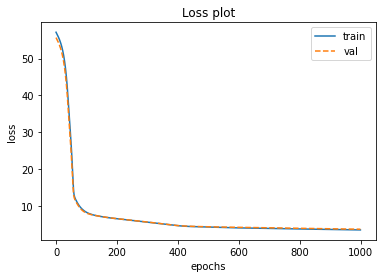

time: 180 ms (started: 2021-01-20 11:37:16 +00:00)


In [28]:
plot_loss(history)

In [29]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|3.4988513|	0.00|
Test	|3.6924596|	0.00|
time: 3.22 ms (started: 2021-01-20 11:37:16 +00:00)


## Model 1.2.1 Batch = 128 & n = 100

first model:  
    10->50->2  
    SGD  
    lr = 0.01  
    momentum = 0.0  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [30]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 35.5 ms (started: 2021-01-20 11:38:42 +00:00)


In [31]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 56.8089 - val_loss: 55.1009
Epoch 2/1000
10/10 - 0s - loss: 56.0788 - val_loss: 54.3683
Epoch 3/1000
10/10 - 0s - loss: 55.2898 - val_loss: 53.5553
Epoch 4/1000
10/10 - 0s - loss: 54.3952 - val_loss: 52.6098
Epoch 5/1000
10/10 - 0s - loss: 53.3362 - val_loss: 51.4768
Epoch 6/1000
10/10 - 0s - loss: 52.0514 - val_loss: 50.0846
Epoch 7/1000
10/10 - 0s - loss: 50.4614 - val_loss: 48.3395
Epoch 8/1000
10/10 - 0s - loss: 48.4551 - val_loss: 46.1437
Epoch 9/1000
10/10 - 0s - loss: 45.9249 - val_loss: 43.3255
Epoch 10/1000
10/10 - 0s - loss: 42.6674 - val_loss: 39.7461
Epoch 11/1000
10/10 - 0s - loss: 38.5332 - val_loss: 35.1642
Epoch 12/1000
10/10 - 0s - loss: 33.2574 - val_loss: 29.4132
Epoch 13/1000
10/10 - 0s - loss: 26.7449 - val_loss: 22.5696
Epoch 14/1000
10/10 - 0s - loss: 20.1878 - val_loss: 17.9855
Epoch 15/1000
10/10 - 0s - loss: 16.9918 - val_loss: 16.0568
Epoch 16/1000
10/10 - 0s - loss: 15.7112 - val_loss: 15.1420
Epoch 17/1000
10/10 - 0s - loss: 

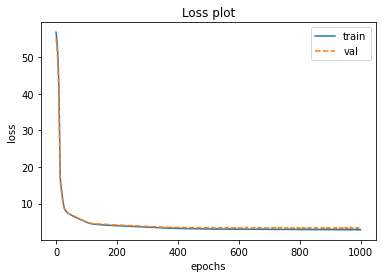

time: 178 ms (started: 2021-01-20 11:39:36 +00:00)


In [32]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.9236367|	0.00|
Test	|3.3568075|	0.00|
time: 2.78 ms (started: 2021-01-20 11:17:38 +00:00)


## Model 1.2.1 Batch = 128 & n = 100 & momentum = 0.9

first model:  
    10->100->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [33]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 36.8 ms (started: 2021-01-20 11:40:28 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

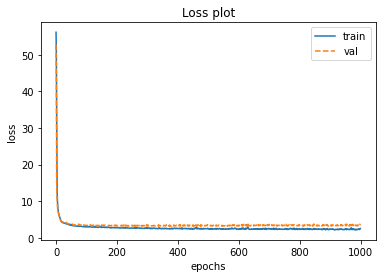

time: 192 ms (started: 2021-01-20 11:41:23 +00:00)


In [35]:
plot_loss(history)

In [36]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.5208828|	0.00|
Test	|3.7181845|	0.00|
time: 3.26 ms (started: 2021-01-20 11:41:23 +00:00)


# Model 3

## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [37]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 50.4 ms (started: 2021-01-20 11:42:45 +00:00)


In [38]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 56.3977 - val_loss: 53.0604
Epoch 2/1000
10/10 - 0s - loss: 47.1505 - val_loss: 17.8791
Epoch 3/1000
10/10 - 0s - loss: 20.8033 - val_loss: 18.0856
Epoch 4/1000
10/10 - 0s - loss: 13.8628 - val_loss: 9.0357
Epoch 5/1000
10/10 - 0s - loss: 9.4041 - val_loss: 10.1137
Epoch 6/1000
10/10 - 0s - loss: 7.8427 - val_loss: 7.4912
Epoch 7/1000
10/10 - 0s - loss: 6.5459 - val_loss: 6.2023
Epoch 8/1000
10/10 - 0s - loss: 5.9124 - val_loss: 6.0548
Epoch 9/1000
10/10 - 0s - loss: 5.3384 - val_loss: 4.7997
Epoch 10/1000
10/10 - 0s - loss: 4.7529 - val_loss: 4.7312
Epoch 11/1000
10/10 - 0s - loss: 4.4108 - val_loss: 4.2871
Epoch 12/1000
10/10 - 0s - loss: 4.2240 - val_loss: 4.1320
Epoch 13/1000
10/10 - 0s - loss: 3.9040 - val_loss: 4.1734
Epoch 14/1000
10/10 - 0s - loss: 3.8615 - val_loss: 4.2150
Epoch 15/1000
10/10 - 0s - loss: 3.8345 - val_loss: 4.0581
Epoch 16/1000
10/10 - 0s - loss: 3.7475 - val_loss: 3.7248
Epoch 17/1000
10/10 - 0s - loss: 3.5290 - val_loss: 3.753

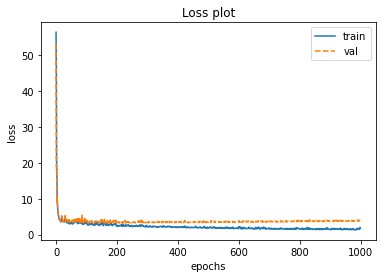

time: 202 ms (started: 2021-01-20 11:43:40 +00:00)


In [39]:
plot_loss(history)

In [40]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|1.7295032|	0.00|
Test	|3.9061797|	0.00|
time: 3.57 ms (started: 2021-01-20 11:43:41 +00:00)


We need to regularize


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [56]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 48.1 ms (started: 2021-01-20 12:01:07 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

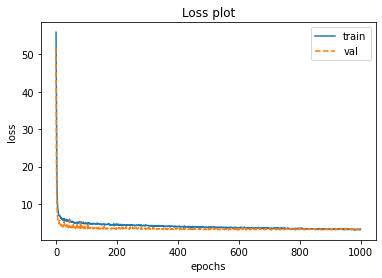

time: 188 ms (started: 2021-01-20 12:02:05 +00:00)


In [58]:
plot_loss(history)

In [59]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|3.2736526|	0.00|
Test	|3.3732142|	0.00|
time: 3.71 ms (started: 2021-01-20 12:02:05 +00:00)


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [60]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.0))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 49 ms (started: 2021-01-20 12:02:43 +00:00)


In [61]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 0s - loss: 55.4727 - val_loss: 50.1817
Epoch 2/1000
10/10 - 0s - loss: 36.3805 - val_loss: 30.7627
Epoch 3/1000
10/10 - 0s - loss: 19.4432 - val_loss: 15.2300
Epoch 4/1000
10/10 - 0s - loss: 13.3410 - val_loss: 10.4724
Epoch 5/1000
10/10 - 0s - loss: 9.3792 - val_loss: 7.9369
Epoch 6/1000
10/10 - 0s - loss: 8.3547 - val_loss: 6.8024
Epoch 7/1000
10/10 - 0s - loss: 6.7464 - val_loss: 5.4669
Epoch 8/1000
10/10 - 0s - loss: 5.9549 - val_loss: 4.8781
Epoch 9/1000
10/10 - 0s - loss: 5.5566 - val_loss: 4.7142
Epoch 10/1000
10/10 - 0s - loss: 5.5177 - val_loss: 5.8938
Epoch 11/1000
10/10 - 0s - loss: 5.4894 - val_loss: 4.6184
Epoch 12/1000
10/10 - 0s - loss: 5.2908 - val_loss: 4.3643
Epoch 13/1000
10/10 - 0s - loss: 5.2817 - val_loss: 4.8023
Epoch 14/1000
10/10 - 0s - loss: 5.2175 - val_loss: 4.4292
Epoch 15/1000
10/10 - 0s - loss: 5.0871 - val_loss: 4.4869
Epoch 16/1000
10/10 - 0s - loss: 4.8129 - val_loss: 4.2614
Epoch 17/1000
10/10 - 0s - loss: 4.7309 - val_loss: 4.217

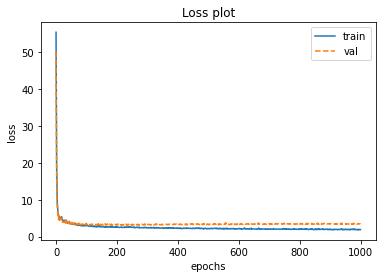

time: 196 ms (started: 2021-01-20 12:03:41 +00:00)


In [62]:
plot_loss(history)

In [63]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|1.8955323|	0.00|
Test	|3.3796940|	0.00|
time: 2.4 ms (started: 2021-01-20 12:03:41 +00:00)


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [64]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.03))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 50.8 ms (started: 2021-01-20 12:04:17 +00:00)


In [65]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 56.4529 - val_loss: 53.4132
Epoch 2/1000
10/10 - 0s - loss: 48.5190 - val_loss: 23.7680
Epoch 3/1000
10/10 - 0s - loss: 21.3824 - val_loss: 16.8807
Epoch 4/1000
10/10 - 0s - loss: 13.9114 - val_loss: 9.4456
Epoch 5/1000
10/10 - 0s - loss: 9.7494 - val_loss: 6.7820
Epoch 6/1000
10/10 - 0s - loss: 8.6474 - val_loss: 6.3056
Epoch 7/1000
10/10 - 0s - loss: 8.0422 - val_loss: 6.6239
Epoch 8/1000
10/10 - 0s - loss: 7.0425 - val_loss: 5.3724
Epoch 9/1000
10/10 - 0s - loss: 6.5472 - val_loss: 5.2629
Epoch 10/1000
10/10 - 0s - loss: 6.1776 - val_loss: 4.8984
Epoch 11/1000
10/10 - 0s - loss: 5.9529 - val_loss: 4.7765
Epoch 12/1000
10/10 - 0s - loss: 5.7224 - val_loss: 4.3755
Epoch 13/1000
10/10 - 0s - loss: 5.4636 - val_loss: 4.2978
Epoch 14/1000
10/10 - 0s - loss: 5.5016 - val_loss: 4.0735
Epoch 15/1000
10/10 - 0s - loss: 5.3504 - val_loss: 4.2724
Epoch 16/1000
10/10 - 0s - loss: 5.3105 - val_loss: 4.0899
Epoch 17/1000
10/10 - 0s - loss: 5.0037 - val_loss: 4.5263

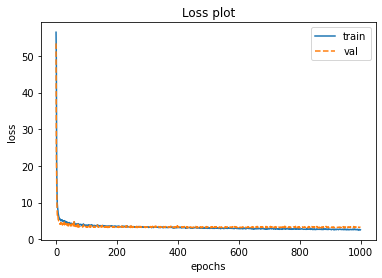

time: 186 ms (started: 2021-01-20 12:05:13 +00:00)


In [66]:
plot_loss(history)

In [67]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.5695419|	0.00|
Test	|3.1860366|	0.00|
time: 3.39 ms (started: 2021-01-20 12:05:14 +00:00)


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [68]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 51.5 ms (started: 2021-01-20 12:05:48 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

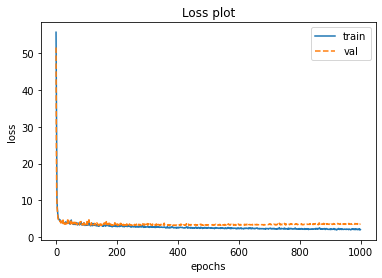

time: 204 ms (started: 2021-01-20 12:06:48 +00:00)


In [70]:
plot_loss(history)

In [71]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.0181911|	0.00|
Test	|3.6050494|	0.00|
time: 2.91 ms (started: 2021-01-20 12:06:49 +00:00)


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [72]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.03))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 54.3 ms (started: 2021-01-20 12:07:36 +00:00)


In [73]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 55.1709 - val_loss: 49.2675
Epoch 2/1000
10/10 - 0s - loss: 35.2307 - val_loss: 25.3757
Epoch 3/1000
10/10 - 0s - loss: 16.9795 - val_loss: 16.9175
Epoch 4/1000
10/10 - 0s - loss: 11.8164 - val_loss: 8.2906
Epoch 5/1000
10/10 - 0s - loss: 8.2823 - val_loss: 7.3192
Epoch 6/1000
10/10 - 0s - loss: 6.9625 - val_loss: 6.2587
Epoch 7/1000
10/10 - 0s - loss: 6.0413 - val_loss: 5.4504
Epoch 8/1000
10/10 - 0s - loss: 5.6055 - val_loss: 5.0337
Epoch 9/1000
10/10 - 0s - loss: 5.2883 - val_loss: 4.8283
Epoch 10/1000
10/10 - 0s - loss: 4.8622 - val_loss: 4.4424
Epoch 11/1000
10/10 - 0s - loss: 4.5672 - val_loss: 4.2313
Epoch 12/1000
10/10 - 0s - loss: 4.3922 - val_loss: 4.1584
Epoch 13/1000
10/10 - 0s - loss: 4.4128 - val_loss: 4.2895
Epoch 14/1000
10/10 - 0s - loss: 4.3361 - val_loss: 4.0396
Epoch 15/1000
10/10 - 0s - loss: 4.2597 - val_loss: 4.1855
Epoch 16/1000
10/10 - 0s - loss: 4.2927 - val_loss: 4.0624
Epoch 17/1000
10/10 - 0s - loss: 4.3271 - val_loss: 4.6945

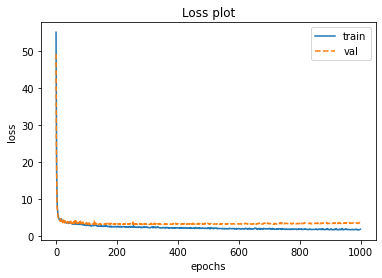

time: 190 ms (started: 2021-01-20 12:08:39 +00:00)


In [74]:
plot_loss(history)

In [75]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|1.8554684|	0.00|
Test	|3.6931021|	0.00|
time: 3.3 ms (started: 2021-01-20 12:08:39 +00:00)


## Model 3.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [76]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.03))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 49.2 ms (started: 2021-01-20 12:09:20 +00:00)


In [77]:
history = model.fit(Xtrain, ytrain,
                    batch_size=64,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
20/20 - 1s - loss: 50.1774 - val_loss: 20.4715
Epoch 2/1000
20/20 - 0s - loss: 17.7468 - val_loss: 11.7968
Epoch 3/1000
20/20 - 0s - loss: 9.6708 - val_loss: 10.0454
Epoch 4/1000
20/20 - 0s - loss: 8.4516 - val_loss: 8.7608
Epoch 5/1000
20/20 - 0s - loss: 6.7604 - val_loss: 6.4020
Epoch 6/1000
20/20 - 0s - loss: 6.2025 - val_loss: 6.4922
Epoch 7/1000
20/20 - 0s - loss: 5.7090 - val_loss: 7.8374
Epoch 8/1000
20/20 - 0s - loss: 6.4517 - val_loss: 6.0798
Epoch 9/1000
20/20 - 0s - loss: 5.4756 - val_loss: 5.9326
Epoch 10/1000
20/20 - 0s - loss: 5.0405 - val_loss: 4.4448
Epoch 11/1000
20/20 - 0s - loss: 4.5619 - val_loss: 11.0400
Epoch 12/1000
20/20 - 0s - loss: 7.6884 - val_loss: 9.3135
Epoch 13/1000
20/20 - 0s - loss: 5.9882 - val_loss: 4.3496
Epoch 14/1000
20/20 - 0s - loss: 4.3703 - val_loss: 7.3430
Epoch 15/1000
20/20 - 0s - loss: 5.0272 - val_loss: 7.4605
Epoch 16/1000
20/20 - 0s - loss: 6.0713 - val_loss: 4.5918
Epoch 17/1000
20/20 - 0s - loss: 4.5823 - val_loss: 8.8586


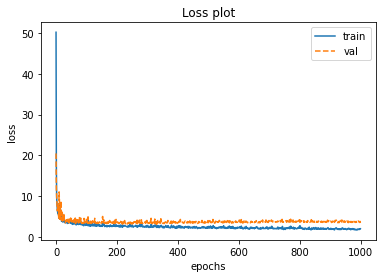

time: 223 ms (started: 2021-01-20 12:10:31 +00:00)


In [78]:
plot_loss(history)

In [79]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|1.9964221|	0.00|
Test	|3.5450308|	0.00|
time: 4.34 ms (started: 2021-01-20 12:10:31 +00:00)


## Model 3.1 Batch = 128 & n = 100 & momentum = 0.9

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [41]:
# create model
L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(2, kernel_initializer='glorot_uniform', kernel_regularizer=L2))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 47.2 ms (started: 2021-01-20 11:48:31 +00:00)


In [42]:
history = model.fit(Xtrain, ytrain,
                    batch_size=128,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
10/10 - 1s - loss: 56.8411 - val_loss: 54.0235
Epoch 2/1000
10/10 - 0s - loss: 51.4241 - val_loss: 35.2983
Epoch 3/1000
10/10 - 0s - loss: 23.8832 - val_loss: 21.1164
Epoch 4/1000
10/10 - 0s - loss: 17.9892 - val_loss: 10.0045
Epoch 5/1000
10/10 - 0s - loss: 11.0891 - val_loss: 9.9916
Epoch 6/1000
10/10 - 0s - loss: 8.4900 - val_loss: 7.0525
Epoch 7/1000
10/10 - 0s - loss: 7.1927 - val_loss: 6.1281
Epoch 8/1000
10/10 - 0s - loss: 6.1244 - val_loss: 5.7875
Epoch 9/1000
10/10 - 0s - loss: 5.4941 - val_loss: 5.3269
Epoch 10/1000
10/10 - 0s - loss: 5.2246 - val_loss: 5.1289
Epoch 11/1000
10/10 - 0s - loss: 4.8109 - val_loss: 4.8368
Epoch 12/1000
10/10 - 0s - loss: 4.6058 - val_loss: 4.4253
Epoch 13/1000
10/10 - 0s - loss: 4.5020 - val_loss: 4.2721
Epoch 14/1000
10/10 - 0s - loss: 4.0406 - val_loss: 4.2147
Epoch 15/1000
10/10 - 0s - loss: 4.0117 - val_loss: 4.3114
Epoch 16/1000
10/10 - 0s - loss: 4.0625 - val_loss: 3.9508
Epoch 17/1000
10/10 - 0s - loss: 4.1485 - val_loss: 4.34

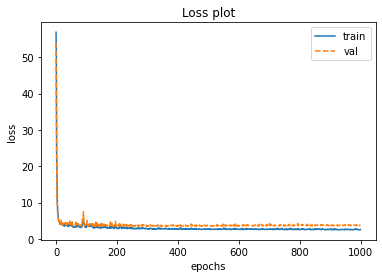

time: 184 ms (started: 2021-01-20 11:49:30 +00:00)


In [43]:
plot_loss(history)

In [44]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.6008716|	0.00|
Test	|3.8378251|	0.00|
time: 4.55 ms (started: 2021-01-20 11:49:30 +00:00)


We need to regularize


## Model 3.1 Batch = ALL & n = 100 & momentum = 0.9

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [45]:
# create model
L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(2, kernel_initializer='glorot_uniform', kernel_regularizer=L2))
optimizer = SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 48.4 ms (started: 2021-01-20 11:50:13 +00:00)


In [47]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 4.5979 - val_loss: 4.2669
Epoch 2/1000
1/1 - 0s - loss: 4.0651 - val_loss: 4.3337
Epoch 3/1000
1/1 - 0s - loss: 4.2078 - val_loss: 4.2731
Epoch 4/1000
1/1 - 0s - loss: 4.0729 - val_loss: 3.9798
Epoch 5/1000
1/1 - 0s - loss: 3.7124 - val_loss: 4.1328
Epoch 6/1000
1/1 - 0s - loss: 3.9313 - val_loss: 3.9580
Epoch 7/1000
1/1 - 0s - loss: 3.6899 - val_loss: 4.0214
Epoch 8/1000
1/1 - 0s - loss: 3.7005 - val_loss: 3.8929
Epoch 9/1000
1/1 - 0s - loss: 3.6063 - val_loss: 3.8764
Epoch 10/1000
1/1 - 0s - loss: 3.6373 - val_loss: 3.7023
Epoch 11/1000
1/1 - 0s - loss: 3.4970 - val_loss: 3.7925
Epoch 12/1000
1/1 - 0s - loss: 3.5078 - val_loss: 3.7210
Epoch 13/1000
1/1 - 0s - loss: 3.4538 - val_loss: 3.7737
Epoch 14/1000
1/1 - 0s - loss: 3.5156 - val_loss: 3.6294
Epoch 15/1000
1/1 - 0s - loss: 3.3756 - val_loss: 3.5416
Epoch 16/1000
1/1 - 0s - loss: 3.3214 - val_loss: 3.6618
Epoch 17/1000
1/1 - 0s - loss: 3.4375 - val_loss: 3.4778
Epoch 18/1000
1/1 - 0s - loss: 3.2028 - 

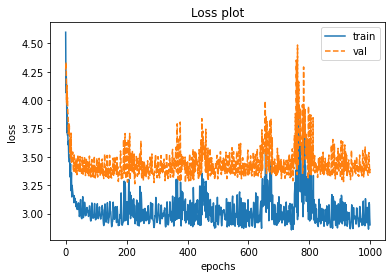

time: 211 ms (started: 2021-01-20 11:52:01 +00:00)


In [48]:
plot_loss(history)

In [49]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.9009955|	0.00|
Test	|3.3922880|	0.00|
time: 2.55 ms (started: 2021-01-20 11:52:01 +00:00)


We need to regularize


## Model 3.1 Batch = ALL & n = 100 & momentum = 0.9

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [50]:
# create model
L2 = tf.keras.regularizers.L2(l2=0.003)

model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L2))
model.add(Dense(2, kernel_initializer='glorot_uniform', kernel_regularizer=L2))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 42.1 ms (started: 2021-01-20 11:53:37 +00:00)


In [51]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 56.8186 - val_loss: 55.3550
Epoch 2/1000
1/1 - 0s - loss: 56.7199 - val_loss: 55.1620
Epoch 3/1000
1/1 - 0s - loss: 56.5291 - val_loss: 54.8788
Epoch 4/1000
1/1 - 0s - loss: 56.2494 - val_loss: 54.5039
Epoch 5/1000
1/1 - 0s - loss: 55.8802 - val_loss: 54.0327
Epoch 6/1000
1/1 - 0s - loss: 55.4155 - val_loss: 53.4506
Epoch 7/1000
1/1 - 0s - loss: 54.8400 - val_loss: 52.7261
Epoch 8/1000
1/1 - 0s - loss: 54.1228 - val_loss: 51.8086
Epoch 9/1000
1/1 - 0s - loss: 53.2144 - val_loss: 50.6219
Epoch 10/1000
1/1 - 0s - loss: 52.0398 - val_loss: 49.0560
Epoch 11/1000
1/1 - 0s - loss: 50.4910 - val_loss: 46.9497
Epoch 12/1000
1/1 - 0s - loss: 48.4109 - val_loss: 44.0684
Epoch 13/1000
1/1 - 0s - loss: 45.5715 - val_loss: 40.0982
Epoch 14/1000
1/1 - 0s - loss: 41.6688 - val_loss: 34.8804
Epoch 15/1000
1/1 - 0s - loss: 36.5694 - val_loss: 29.9036
Epoch 16/1000
1/1 - 0s - loss: 31.7853 - val_loss: 27.7339
Epoch 17/1000
1/1 - 0s - loss: 29.2803 - val_loss: 25.2151
Epoch 

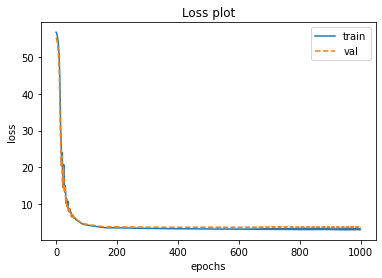

time: 193 ms (started: 2021-01-20 11:54:27 +00:00)


In [52]:
plot_loss(history)

In [53]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|3.0543931|	0.00|
Test	|3.7143886|	0.00|
time: 3.03 ms (started: 2021-01-20 11:54:28 +00:00)


We need to regularize


#Model 4

## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [80]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.03))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.03))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 63.5 ms (started: 2021-01-20 12:10:55 +00:00)


In [81]:
history = model.fit(Xtrain, ytrain,
                    batch_size=64,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 47.4160 - val_loss: 25.1939
Epoch 2/1000
20/20 - 0s - loss: 19.8639 - val_loss: 17.2357
Epoch 3/1000
20/20 - 0s - loss: 11.0203 - val_loss: 6.4029
Epoch 4/1000
20/20 - 0s - loss: 6.7438 - val_loss: 5.7507
Epoch 5/1000
20/20 - 0s - loss: 5.6117 - val_loss: 4.6335
Epoch 6/1000
20/20 - 0s - loss: 4.2177 - val_loss: 5.8915
Epoch 7/1000
20/20 - 0s - loss: 5.0489 - val_loss: 11.4336
Epoch 8/1000
20/20 - 0s - loss: 8.1826 - val_loss: 7.5781
Epoch 9/1000
20/20 - 0s - loss: 6.4513 - val_loss: 4.9757
Epoch 10/1000
20/20 - 0s - loss: 4.4624 - val_loss: 3.8960
Epoch 11/1000
20/20 - 0s - loss: 4.2600 - val_loss: 4.5927
Epoch 12/1000
20/20 - 0s - loss: 4.0493 - val_loss: 4.0489
Epoch 13/1000
20/20 - 0s - loss: 3.6863 - val_loss: 6.3024
Epoch 14/1000
20/20 - 0s - loss: 4.6929 - val_loss: 4.3871
Epoch 15/1000
20/20 - 0s - loss: 3.8641 - val_loss: 6.2597
Epoch 16/1000
20/20 - 0s - loss: 4.3518 - val_loss: 6.9150
Epoch 17/1000
20/20 - 0s - loss: 5.1439 - val_loss: 4.6770


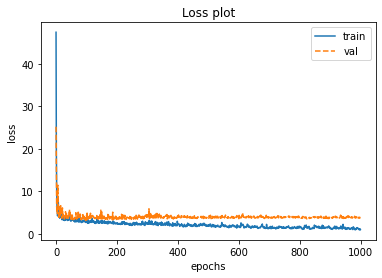

time: 199 ms (started: 2021-01-20 12:12:07 +00:00)


In [82]:
plot_loss(history)

In [83]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|1.0073885|	0.00|
Test	|3.8008454|	0.00|
time: 3.1 ms (started: 2021-01-20 12:12:07 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [84]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.03))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 64.6 ms (started: 2021-01-20 12:13:01 +00:00)


In [85]:
history = model.fit(Xtrain, ytrain,
                    batch_size=64,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
20/20 - 1s - loss: 46.9283 - val_loss: 23.5718
Epoch 2/1000
20/20 - 0s - loss: 17.3852 - val_loss: 14.9732
Epoch 3/1000
20/20 - 0s - loss: 10.5894 - val_loss: 5.6277
Epoch 4/1000
20/20 - 0s - loss: 6.2675 - val_loss: 5.2148
Epoch 5/1000
20/20 - 0s - loss: 5.8646 - val_loss: 10.4934
Epoch 6/1000
20/20 - 0s - loss: 8.1668 - val_loss: 5.3255
Epoch 7/1000
20/20 - 0s - loss: 5.3255 - val_loss: 4.7173
Epoch 8/1000
20/20 - 0s - loss: 4.3633 - val_loss: 6.6160
Epoch 9/1000
20/20 - 0s - loss: 6.2455 - val_loss: 13.7626
Epoch 10/1000
20/20 - 0s - loss: 7.5744 - val_loss: 4.9633
Epoch 11/1000
20/20 - 0s - loss: 5.1680 - val_loss: 4.7859
Epoch 12/1000
20/20 - 0s - loss: 4.1358 - val_loss: 4.2796
Epoch 13/1000
20/20 - 0s - loss: 3.9188 - val_loss: 5.5486
Epoch 14/1000
20/20 - 0s - loss: 5.0372 - val_loss: 4.9324
Epoch 15/1000
20/20 - 0s - loss: 4.3096 - val_loss: 3.6979
Epoch 16/1000
20/20 - 0s - loss: 3.9632 - val_loss: 4.6082
Epoch 17/1000
20/20 - 0s - loss: 3.6960 - val_loss: 5.3783

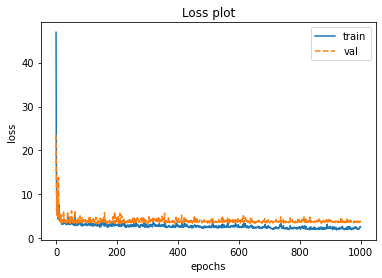

time: 214 ms (started: 2021-01-20 12:14:29 +00:00)


In [86]:
plot_loss(history)

In [87]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.4956167|	0.00|
Test	|3.5624416|	0.00|
time: 3.4 ms (started: 2021-01-20 12:14:29 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [88]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.03))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 67.2 ms (started: 2021-01-20 12:14:43 +00:00)


In [89]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 57.3930 - val_loss: 55.9921
Epoch 2/1000
1/1 - 0s - loss: 57.3545 - val_loss: 55.9165
Epoch 3/1000
1/1 - 0s - loss: 57.2744 - val_loss: 55.8142
Epoch 4/1000
1/1 - 0s - loss: 57.1751 - val_loss: 55.6937
Epoch 5/1000
1/1 - 0s - loss: 57.0558 - val_loss: 55.5621
Epoch 6/1000
1/1 - 0s - loss: 56.9203 - val_loss: 55.4227
Epoch 7/1000
1/1 - 0s - loss: 56.7828 - val_loss: 55.2744
Epoch 8/1000
1/1 - 0s - loss: 56.6245 - val_loss: 55.1129
Epoch 9/1000
1/1 - 0s - loss: 56.4621 - val_loss: 54.9321
Epoch 10/1000
1/1 - 0s - loss: 56.2730 - val_loss: 54.7238
Epoch 11/1000
1/1 - 0s - loss: 56.0679 - val_loss: 54.4778
Epoch 12/1000
1/1 - 0s - loss: 55.8156 - val_loss: 54.1764
Epoch 13/1000
1/1 - 0s - loss: 55.5166 - val_loss: 53.7986
Epoch 14/1000
1/1 - 0s - loss: 55.1404 - val_loss: 53.3152
Epoch 15/1000
1/1 - 0s - loss: 54.6484 - val_loss: 52.6802
Epoch 16/1000
1/1 - 0s - loss: 54.0218 - val_loss: 51.8202
Epoch 17/1000
1/1 - 0s - loss: 53.1656 - val_loss: 50.6132
Epoch 

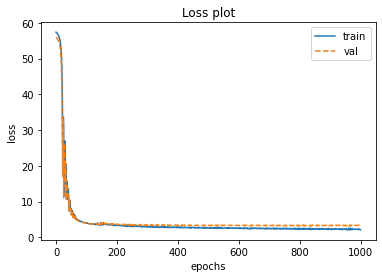

time: 214 ms (started: 2021-01-20 12:15:41 +00:00)


In [90]:
plot_loss(history)

In [91]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.0912354|	0.00|
Test	|3.2726171|	0.00|
time: 4.06 ms (started: 2021-01-20 12:15:42 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [92]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 67.9 ms (started: 2021-01-20 12:16:34 +00:00)


In [93]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.1097 - val_loss: 55.7189
Epoch 2/1000
1/1 - 0s - loss: 57.0588 - val_loss: 55.6298
Epoch 3/1000
1/1 - 0s - loss: 56.9716 - val_loss: 55.4986
Epoch 4/1000
1/1 - 0s - loss: 56.8359 - val_loss: 55.3238
Epoch 5/1000
1/1 - 0s - loss: 56.6487 - val_loss: 55.1048
Epoch 6/1000
1/1 - 0s - loss: 56.4268 - val_loss: 54.8359
Epoch 7/1000
1/1 - 0s - loss: 56.1480 - val_loss: 54.5009
Epoch 8/1000
1/1 - 0s - loss: 55.8005 - val_loss: 54.0694
Epoch 9/1000
1/1 - 0s - loss: 55.3528 - val_loss: 53.4906
Epoch 10/1000
1/1 - 0s - loss: 54.7496 - val_loss: 52.6894
Epoch 11/1000
1/1 - 0s - loss: 53.9351 - val_loss: 51.5447
Epoch 12/1000
1/1 - 0s - loss: 52.7736 - val_loss: 49.8428
Epoch 13/1000
1/1 - 0s - loss: 51.0103 - val_loss: 47.1933
Epoch 14/1000
1/1 - 0s - loss: 48.3090 - val_loss: 42.8615
Epoch 15/1000
1/1 - 0s - loss: 43.8884 - val_loss: 35.3991
Epoch 16/1000
1/1 - 0s - loss: 36.3474 - val_loss: 24.5896
Epoch 17/1000
1/1 - 0s - loss: 25.6628 - val_loss: 18.9239
Epoch 

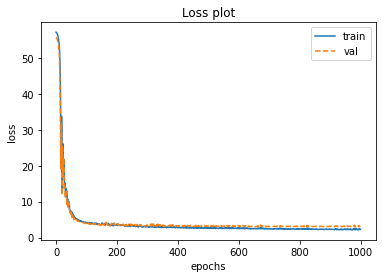

time: 196 ms (started: 2021-01-20 12:17:34 +00:00)


In [94]:
plot_loss(history)

In [95]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2762194|	0.00|
Test	|3.1072347|	0.00|
time: 3.31 ms (started: 2021-01-20 12:17:34 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [96]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 72.6 ms (started: 2021-01-20 12:18:06 +00:00)


In [97]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.0744 - val_loss: 55.6746
Epoch 2/1000
1/1 - 0s - loss: 57.0179 - val_loss: 55.5717
Epoch 3/1000
1/1 - 0s - loss: 56.9119 - val_loss: 55.4258
Epoch 4/1000
1/1 - 0s - loss: 56.7668 - val_loss: 55.2391
Epoch 5/1000
1/1 - 0s - loss: 56.5773 - val_loss: 55.0082
Epoch 6/1000
1/1 - 0s - loss: 56.3463 - val_loss: 54.7235
Epoch 7/1000
1/1 - 0s - loss: 56.0566 - val_loss: 54.3656
Epoch 8/1000
1/1 - 0s - loss: 55.6851 - val_loss: 53.9049
Epoch 9/1000
1/1 - 0s - loss: 55.2242 - val_loss: 53.2945
Epoch 10/1000
1/1 - 0s - loss: 54.6037 - val_loss: 52.4594
Epoch 11/1000
1/1 - 0s - loss: 53.7657 - val_loss: 51.2760
Epoch 12/1000
1/1 - 0s - loss: 52.5588 - val_loss: 49.5324
Epoch 13/1000
1/1 - 0s - loss: 50.7972 - val_loss: 46.8480
Epoch 14/1000
1/1 - 0s - loss: 48.0747 - val_loss: 42.4972
Epoch 15/1000
1/1 - 0s - loss: 43.7571 - val_loss: 35.1489
Epoch 16/1000
1/1 - 0s - loss: 36.3389 - val_loss: 24.1036
Epoch 17/1000
1/1 - 0s - loss: 25.7916 - val_loss: 17.9210
Epoch 

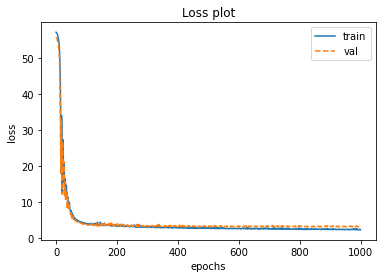

time: 210 ms (started: 2021-01-20 12:19:06 +00:00)


In [98]:
plot_loss(history)

In [99]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2437880|	0.00|
Test	|3.2310560|	0.00|
time: 3.56 ms (started: 2021-01-20 12:19:06 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [100]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 67.7 ms (started: 2021-01-20 12:19:26 +00:00)


In [101]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.4776 - val_loss: 56.0040
Epoch 2/1000
1/1 - 0s - loss: 57.3910 - val_loss: 55.8408
Epoch 3/1000
1/1 - 0s - loss: 57.2246 - val_loss: 55.6205
Epoch 4/1000
1/1 - 0s - loss: 56.9997 - val_loss: 55.3596
Epoch 5/1000
1/1 - 0s - loss: 56.7341 - val_loss: 55.0632
Epoch 6/1000
1/1 - 0s - loss: 56.4271 - val_loss: 54.7276
Epoch 7/1000
1/1 - 0s - loss: 56.0836 - val_loss: 54.3371
Epoch 8/1000
1/1 - 0s - loss: 55.6884 - val_loss: 53.8542
Epoch 9/1000
1/1 - 0s - loss: 55.2009 - val_loss: 53.2209
Epoch 10/1000
1/1 - 0s - loss: 54.5581 - val_loss: 52.3497
Epoch 11/1000
1/1 - 0s - loss: 53.6891 - val_loss: 51.1024
Epoch 12/1000
1/1 - 0s - loss: 52.4337 - val_loss: 49.2385
Epoch 13/1000
1/1 - 0s - loss: 50.5542 - val_loss: 46.3175
Epoch 14/1000
1/1 - 0s - loss: 47.6487 - val_loss: 41.5180
Epoch 15/1000
1/1 - 0s - loss: 42.8937 - val_loss: 33.6730
Epoch 16/1000
1/1 - 0s - loss: 35.2425 - val_loss: 26.1289
Epoch 17/1000
1/1 - 0s - loss: 27.9398 - val_loss: 22.7317
Epoch 

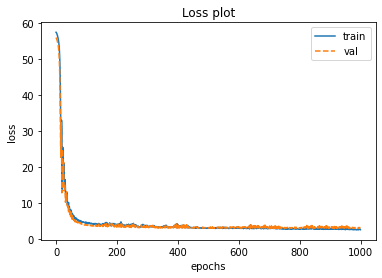

time: 215 ms (started: 2021-01-20 12:20:25 +00:00)


In [102]:
plot_loss(history)

In [103]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.6337080|	0.00|
Test	|3.2077825|	0.00|
time: 3.06 ms (started: 2021-01-20 12:20:25 +00:00)


## Model 4.1 Batch = 64 & n = 100 & momentum = 0.9 & Dropout

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [ ]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer=optimizer,
            loss=euclidean_distance_loss)

time: 72.6 ms (started: 2021-01-20 12:18:06 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.0744 - val_loss: 55.6746
Epoch 2/1000
1/1 - 0s - loss: 57.0179 - val_loss: 55.5717
Epoch 3/1000
1/1 - 0s - loss: 56.9119 - val_loss: 55.4258
Epoch 4/1000
1/1 - 0s - loss: 56.7668 - val_loss: 55.2391
Epoch 5/1000
1/1 - 0s - loss: 56.5773 - val_loss: 55.0082
Epoch 6/1000
1/1 - 0s - loss: 56.3463 - val_loss: 54.7235
Epoch 7/1000
1/1 - 0s - loss: 56.0566 - val_loss: 54.3656
Epoch 8/1000
1/1 - 0s - loss: 55.6851 - val_loss: 53.9049
Epoch 9/1000
1/1 - 0s - loss: 55.2242 - val_loss: 53.2945
Epoch 10/1000
1/1 - 0s - loss: 54.6037 - val_loss: 52.4594
Epoch 11/1000
1/1 - 0s - loss: 53.7657 - val_loss: 51.2760
Epoch 12/1000
1/1 - 0s - loss: 52.5588 - val_loss: 49.5324
Epoch 13/1000
1/1 - 0s - loss: 50.7972 - val_loss: 46.8480
Epoch 14/1000
1/1 - 0s - loss: 48.0747 - val_loss: 42.4972
Epoch 15/1000
1/1 - 0s - loss: 43.7571 - val_loss: 35.1489
Epoch 16/1000
1/1 - 0s - loss: 36.3389 - val_loss: 24.1036
Epoch 17/1000
1/1 - 0s - loss: 25.7916 - val_loss: 17.9210
Epoch 

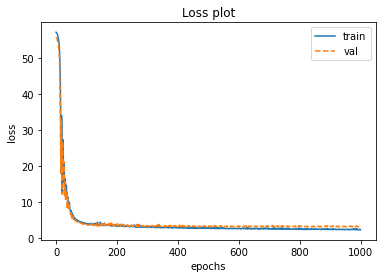

time: 210 ms (started: 2021-01-20 12:19:06 +00:00)


In [ ]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.2437880|	0.00|
Test	|3.2310560|	0.00|
time: 3.56 ms (started: 2021-01-20 12:19:06 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [104]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 64.6 ms (started: 2021-01-20 12:21:35 +00:00)


In [106]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 5.8259 - val_loss: 5.5179
Epoch 2/1000
1/1 - 0s - loss: 5.8311 - val_loss: 5.4974
Epoch 3/1000
1/1 - 0s - loss: 5.8398 - val_loss: 5.4758
Epoch 4/1000
1/1 - 0s - loss: 5.8028 - val_loss: 5.4494
Epoch 5/1000
1/1 - 0s - loss: 5.7493 - val_loss: 5.4281
Epoch 6/1000
1/1 - 0s - loss: 5.6801 - val_loss: 5.4105
Epoch 7/1000
1/1 - 0s - loss: 5.7499 - val_loss: 5.3954
Epoch 8/1000
1/1 - 0s - loss: 5.6957 - val_loss: 5.3820
Epoch 9/1000
1/1 - 0s - loss: 5.7160 - val_loss: 5.3735
Epoch 10/1000
1/1 - 0s - loss: 5.5903 - val_loss: 5.3660
Epoch 11/1000
1/1 - 0s - loss: 5.7042 - val_loss: 5.3584
Epoch 12/1000
1/1 - 0s - loss: 5.5800 - val_loss: 5.3392
Epoch 13/1000
1/1 - 0s - loss: 5.6566 - val_loss: 5.3128
Epoch 14/1000
1/1 - 0s - loss: 5.5356 - val_loss: 5.2871
Epoch 15/1000
1/1 - 0s - loss: 5.4760 - val_loss: 5.2634
Epoch 16/1000
1/1 - 0s - loss: 5.6139 - val_loss: 5.2434
Epoch 17/1000
1/1 - 0s - loss: 5.7044 - val_loss: 5.2269
Epoch 18/1000
1/1 - 0s - loss: 5.4598 - 

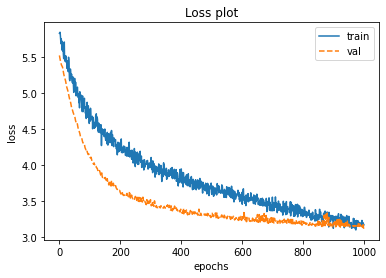

time: 214 ms (started: 2021-01-20 12:23:23 +00:00)


In [107]:
plot_loss(history)

In [108]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|3.1711063|	0.00|
Test	|3.1119158|	0.00|
time: 4.83 ms (started: 2021-01-20 12:23:23 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [117]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.1, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 54.2 ms (started: 2021-01-20 12:26:40 +00:00)


In [118]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 57.0219 - val_loss: 55.5429
Epoch 2/1000
1/1 - 0s - loss: 56.8800 - val_loss: 55.4088
Epoch 3/1000
1/1 - 0s - loss: 56.7429 - val_loss: 55.2755
Epoch 4/1000
1/1 - 0s - loss: 56.6065 - val_loss: 55.1395
Epoch 5/1000
1/1 - 0s - loss: 56.4671 - val_loss: 54.9976
Epoch 6/1000
1/1 - 0s - loss: 56.3218 - val_loss: 54.8496
Epoch 7/1000
1/1 - 0s - loss: 56.1694 - val_loss: 54.6945
Epoch 8/1000
1/1 - 0s - loss: 56.0094 - val_loss: 54.5314
Epoch 9/1000
1/1 - 0s - loss: 55.8411 - val_loss: 54.3592
Epoch 10/1000
1/1 - 0s - loss: 55.6637 - val_loss: 54.1767
Epoch 11/1000
1/1 - 0s - loss: 55.4761 - val_loss: 53.9825
Epoch 12/1000
1/1 - 0s - loss: 55.2765 - val_loss: 53.7750
Epoch 13/1000
1/1 - 0s - loss: 55.0635 - val_loss: 53.5529
Epoch 14/1000
1/1 - 0s - loss: 54.8357 - val_loss: 53.3146
Epoch 15/1000
1/1 - 0s - loss: 54.5916 - val_loss: 53.0582
Epoch 16/1000
1/1 - 0s - loss: 54.3295 - val_loss: 52.7830
Epoch 17/1000
1/1 - 0s - loss: 54.0484 - val_loss: 52.4880
Epoch 

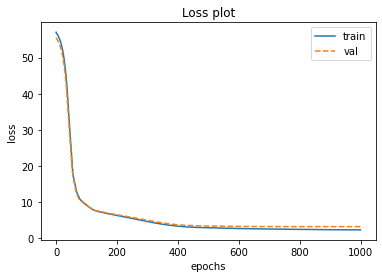

time: 207 ms (started: 2021-01-20 12:27:36 +00:00)


In [119]:
plot_loss(history)

In [121]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3175983|	0.00|
Test	|3.2201080|	0.00|
time: 3.07 ms (started: 2021-01-20 12:27:48 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [122]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.3, momentum=0.9, nesterov=False)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 53.2 ms (started: 2021-01-20 12:28:17 +00:00)


In [123]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.1765 - val_loss: 55.7439
Epoch 2/1000
1/1 - 0s - loss: 57.0668 - val_loss: 55.6379
Epoch 3/1000
1/1 - 0s - loss: 56.9616 - val_loss: 55.5372
Epoch 4/1000
1/1 - 0s - loss: 56.8621 - val_loss: 55.4435
Epoch 5/1000
1/1 - 0s - loss: 56.7685 - val_loss: 55.3551
Epoch 6/1000
1/1 - 0s - loss: 56.6788 - val_loss: 55.2682
Epoch 7/1000
1/1 - 0s - loss: 56.5908 - val_loss: 55.1802
Epoch 8/1000
1/1 - 0s - loss: 56.5021 - val_loss: 55.0898
Epoch 9/1000
1/1 - 0s - loss: 56.4110 - val_loss: 54.9973
Epoch 10/1000
1/1 - 0s - loss: 56.3165 - val_loss: 54.9013
Epoch 11/1000
1/1 - 0s - loss: 56.2183 - val_loss: 54.8011
Epoch 12/1000
1/1 - 0s - loss: 56.1158 - val_loss: 54.6964
Epoch 13/1000
1/1 - 0s - loss: 56.0085 - val_loss: 54.5867
Epoch 14/1000
1/1 - 0s - loss: 55.8958 - val_loss: 54.4710
Epoch 15/1000
1/1 - 0s - loss: 55.7771 - val_loss: 54.3488
Epoch 16/1000
1/1 - 0s - loss: 55.6518 - val_loss: 54.2192
Epoch 17/1000
1/1 - 0s - loss: 55.5193 - val_loss: 54.0815
Epoch 

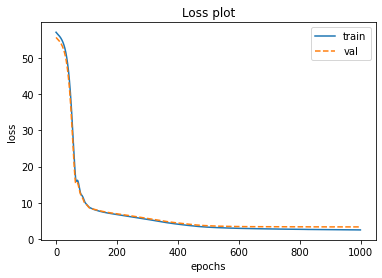

time: 193 ms (started: 2021-01-20 12:29:12 +00:00)


In [124]:
plot_loss(history)

In [125]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.4879477|	0.00|
Test	|3.3279438|	0.00|
time: 4.38 ms (started: 2021-01-20 12:29:12 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [126]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.5, momentum=0.9, nesterov=True)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 61.4 ms (started: 2021-01-20 12:29:52 +00:00)


In [127]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.1548 - val_loss: 55.6793
Epoch 2/1000
1/1 - 0s - loss: 57.0403 - val_loss: 55.5667
Epoch 3/1000
1/1 - 0s - loss: 56.9271 - val_loss: 55.4578
Epoch 4/1000
1/1 - 0s - loss: 56.8167 - val_loss: 55.3530
Epoch 5/1000
1/1 - 0s - loss: 56.7104 - val_loss: 55.2516
Epoch 6/1000
1/1 - 0s - loss: 56.6074 - val_loss: 55.1525
Epoch 7/1000
1/1 - 0s - loss: 56.5066 - val_loss: 55.0538
Epoch 8/1000
1/1 - 0s - loss: 56.4066 - val_loss: 54.9541
Epoch 9/1000
1/1 - 0s - loss: 56.3053 - val_loss: 54.8524
Epoch 10/1000
1/1 - 0s - loss: 56.2017 - val_loss: 54.7470
Epoch 11/1000
1/1 - 0s - loss: 56.0951 - val_loss: 54.6362
Epoch 12/1000
1/1 - 0s - loss: 55.9837 - val_loss: 54.5185
Epoch 13/1000
1/1 - 0s - loss: 55.8657 - val_loss: 54.3928
Epoch 14/1000
1/1 - 0s - loss: 55.7395 - val_loss: 54.2577
Epoch 15/1000
1/1 - 0s - loss: 55.6039 - val_loss: 54.1119
Epoch 16/1000
1/1 - 0s - loss: 55.4579 - val_loss: 53.9543
Epoch 17/1000
1/1 - 0s - loss: 55.3003 - val_loss: 53.7848
Epoch 

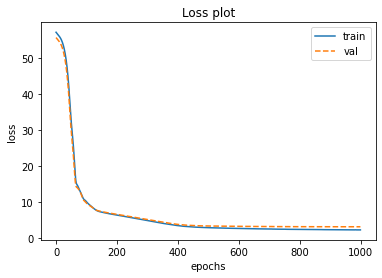

time: 188 ms (started: 2021-01-20 12:30:46 +00:00)


In [128]:
plot_loss(history)

In [129]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3662341|	0.00|
Test	|3.2327986|	0.00|
time: 3.59 ms (started: 2021-01-20 12:30:46 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [130]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.9, momentum=0.9, nesterov=True)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 57 ms (started: 2021-01-20 12:31:39 +00:00)


In [131]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 57.3007 - val_loss: 55.8793
Epoch 2/1000
1/1 - 0s - loss: 57.2168 - val_loss: 55.8030
Epoch 3/1000
1/1 - 0s - loss: 57.1403 - val_loss: 55.7323
Epoch 4/1000
1/1 - 0s - loss: 57.0699 - val_loss: 55.6658
Epoch 5/1000
1/1 - 0s - loss: 57.0041 - val_loss: 55.6039
Epoch 6/1000
1/1 - 0s - loss: 56.9425 - val_loss: 55.5456
Epoch 7/1000
1/1 - 0s - loss: 56.8838 - val_loss: 55.4880
Epoch 8/1000
1/1 - 0s - loss: 56.8260 - val_loss: 55.4299
Epoch 9/1000
1/1 - 0s - loss: 56.7675 - val_loss: 55.3706
Epoch 10/1000
1/1 - 0s - loss: 56.7069 - val_loss: 55.3085
Epoch 11/1000
1/1 - 0s - loss: 56.6437 - val_loss: 55.2433
Epoch 12/1000
1/1 - 0s - loss: 56.5770 - val_loss: 55.1736
Epoch 13/1000
1/1 - 0s - loss: 56.5059 - val_loss: 55.0986
Epoch 14/1000
1/1 - 0s - loss: 56.4297 - val_loss: 55.0174
Epoch 15/1000
1/1 - 0s - loss: 56.3474 - val_loss: 54.9288
Epoch 16/1000
1/1 - 0s - loss: 56.2577 - val_loss: 54.8313
Epoch 17/1000
1/1 - 0s - loss: 56.1591 - val_loss: 54.7237
Epoch 

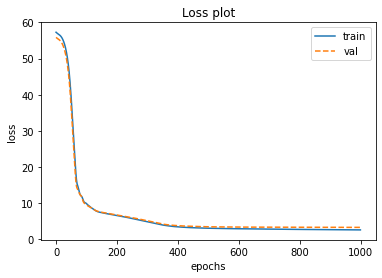

time: 206 ms (started: 2021-01-20 12:32:32 +00:00)


In [132]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3175983|	0.00|
Test	|3.2201080|	0.00|
time: 3.07 ms (started: 2021-01-20 12:27:48 +00:00)


## Model 4.1 Adam

first model:  
    10->64->32->2  
    SGD  
    lr = 0.01  
    momentum = 0.9  
    nesterov = False  
    kernel_regularize= 0.0  
    loss = MEE
    kernel_initializer='glorot_uniform'
    batch = 128

In [133]:
# create model
model = Sequential()
model.add(layers.InputLayer(input_shape=(10)))
model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.01))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dropout(0.001))
model.add(Dense(2, kernel_initializer='glorot_uniform'))
optimizer = SGD(
    learning_rate=0.1, momentum=0.1, nesterov=False)
# Compile model
model.compile(optimizer='adam',
            loss=euclidean_distance_loss)

time: 57 ms (started: 2021-01-20 12:33:11 +00:00)


In [134]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=1000,
                    validation_data=(Xval, yval),
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 56.8729 - val_loss: 55.4309
Epoch 2/1000
1/1 - 0s - loss: 56.7432 - val_loss: 55.2895
Epoch 3/1000
1/1 - 0s - loss: 56.5961 - val_loss: 55.1343
Epoch 4/1000
1/1 - 0s - loss: 56.4358 - val_loss: 54.9674
Epoch 5/1000
1/1 - 0s - loss: 56.2645 - val_loss: 54.7913
Epoch 6/1000
1/1 - 0s - loss: 56.0828 - val_loss: 54.6047
Epoch 7/1000
1/1 - 0s - loss: 55.8907 - val_loss: 54.4067
Epoch 8/1000
1/1 - 0s - loss: 55.6870 - val_loss: 54.1959
Epoch 9/1000
1/1 - 0s - loss: 55.4710 - val_loss: 53.9714
Epoch 10/1000
1/1 - 0s - loss: 55.2418 - val_loss: 53.7330
Epoch 11/1000
1/1 - 0s - loss: 54.9980 - val_loss: 53.4797
Epoch 12/1000
1/1 - 0s - loss: 54.7386 - val_loss: 53.2113
Epoch 13/1000
1/1 - 0s - loss: 54.4630 - val_loss: 52.9269
Epoch 14/1000
1/1 - 0s - loss: 54.1704 - val_loss: 52.6242
Epoch 15/1000
1/1 - 0s - loss: 53.8598 - val_loss: 52.3023
Epoch 16/1000
1/1 - 0s - loss: 53.5299 - val_loss: 51.9599
Epoch 17/1000
1/1 - 0s - loss: 53.1792 - val_loss: 51.5950
Epoch 

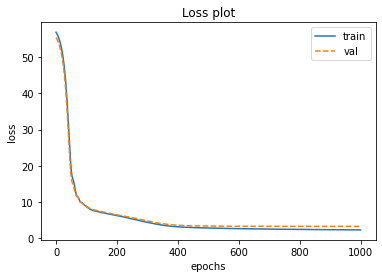

time: 189 ms (started: 2021-01-20 12:34:06 +00:00)


In [135]:
plot_loss(history)

In [ ]:
data = [
    history.history['loss'][-1],
    0,
    history.history['val_loss'][-1],
   0,
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|2.3175983|	0.00|
Test	|3.2201080|	0.00|
time: 3.07 ms (started: 2021-01-20 12:27:48 +00:00)


# Grid Search - Gradient Descent

In [ ]:
best_results_filename = "best_results_cup.txt"
single_grid_results_filename = 'grid_results_cup_v1.csv'

time: 808 µs (started: 2021-01-19 20:26:26 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD

# Function to create model, required for KerasRegressor
def create_model(learn_rate=0.01, momentum=0, neurons=10, init_mode='uniform', activation='relu'):
  # create model
  model = Sequential()
  model.add(layers.InputLayer(input_shape=(10)))
  model.add(Dense(neurons, activation=activation, kernel_initializer=init_mode))
  model.add(Dense(2, activation=activation, kernel_initializer=init_mode))
  optimizer = SGD(
      learning_rate=learn_rate, momentum=momentum, nesterov=False)
  # Compile model
  model.compile(optimizer=optimizer,
              loss=euclidean_distance_loss)
  return model

BATCH_SIZE = len(Xtrain)

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [32]#, 64, 128, BATCH_SIZE]
epochs = [10]
learn_rate = [0.001]#, 0.01, 0.1, 0.3]
momentum = [0.0, 0.2]#, 0.4]#, 0.6, 0.8, 0.9]
neurons = [20, 30, 40]#, 50]
init_mode = ['glorot_uniform']
activation = ['relu', 'tanh', 'sigmoid']

param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate,
                  momentum=momentum, neurons=neurons, init_mode=init_mode, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(Xtrain, ytrain)


time: 31.4 s (started: 2021-01-19 20:27:00 +00:00)


In [ ]:
# summarize results
import pandas as pd

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_epochs,param_init_mode,param_learn_rate,param_momentum,param_neurons,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.254839,0.339409,0.195450,0.028241,relu,32,10,glorot_uniform,0.001,0,20,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-54.595776,-56.728363,-57.563236,-56.295792,1.249478,6
1,0.762981,0.008933,0.159686,0.001202,relu,32,10,glorot_uniform,0.001,0,30,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-55.446629,-56.175278,-56.877594,-56.166500,0.584222,5
2,0.743252,0.005621,0.182526,0.016737,relu,32,10,glorot_uniform,0.001,0,40,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-55.600540,-55.456417,-57.042439,-56.033132,0.716109,4
3,0.776200,0.011924,0.166188,0.003645,relu,32,10,glorot_uniform,0.001,0.2,20,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-54.859673,-55.135387,-55.634293,-55.209784,0.320583,2
4,0.772593,0.002167,0.162421,0.004512,relu,32,10,glorot_uniform,0.001,0.2,30,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-54.799240,-55.022835,-56.333107,-55.385061,0.676556,3
5,0.757498,0.004400,0.162557,0.005227,relu,32,10,glorot_uniform,0.001,0.2,40,"{'activation': 'relu', 'batch_size': 32, 'epoc...",-54.205151,-54.579136,-56.841618,-55.208635,1.164743,1
6,0.751075,0.021833,0.184662,0.010098,tanh,32,10,glorot_uniform,0.001,0,20,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",-56.154034,-56.149021,-58.101654,-56.801570,0.919301,12
7,0.725024,0.006884,0.167295,0.006870,tanh,32,10,glorot_uniform,0.001,0,30,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",-55.965427,-56.286552,-58.274712,-56.842230,1.021366,14
8,0.740944,0.006449,0.257023,0.138910,tanh,32,10,glorot_uniform,0.001,0,40,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",-55.929596,-56.221695,-58.006840,-56.719377,0.918151,9
9,0.764235,0.017006,0.263702,0.141327,tanh,32,10,glorot_uniform,0.001,0.2,20,"{'activation': 'tanh', 'batch_size': 32, 'epoc...",-56.169380,-56.302906,-58.031361,-56.834549,0.848027,13


time: 65.5 ms (started: 2021-01-19 20:28:30 +00:00)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


grid_values_string = f'Grid on: batch_size: {batch_size}, epochs: {epochs}, learn_rate: {learn_rate}, momentum: {momentum}, init_mode = {init_mode} \n'
grid_results_string = f'Best: {grid_result.best_score_} using {grid_result.best_params_} \n'
grid_correspondant_parameter_name = f'Results in: {single_grid_results_filename} \n'
# Open a file with access mode 'a'
with open(best_results_filename, "a") as file_object:
    # Append 'hello' at the end of file
    file_object.write(grid_correspondant_parameter_name)
    file_object.write(grid_values_string)
    file_object.write(grid_results_string)

Best: -55.208635 using {'activation': 'relu', 'batch_size': 32, 'epochs': 10, 'init_mode': 'glorot_uniform', 'learn_rate': 0.001, 'momentum': 0.2, 'neurons': 40}
time: 11.7 ms (started: 2021-01-19 20:28:58 +00:00)


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
import csv

with open(single_grid_results_filename, mode='w') as grid:
    grid = csv.writer(grid, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for mean, stdev, param in zip(means, stds, params):
      grid.writerow([mean, stdev, param])

In [ ]:
# from sklearn.externals import joblib

# # #save your model or results
# # joblib.dump(grid_result, 'gs_object_monk3.pkl')
# # #load your model for further usage
# # boh = joblib.load("gs_object_monk3.pkl")

# # joblib.dump(grid.best_estimator_, 'gs_best_estimator_monk3.pkl', compress = 1)
# # filename = 'finalized_model.sav'
# # pickle.dump(model, open(filename, 'wb'))